# Suicides in India 
With a population of 1.3 billion, it isn’t surprising that India ranks high in suicides. As a child growing up in India, news of farmers committing suicide to avoid paying debts was common every summer. As the summers grew hotter, these suicide rates kept increasing. The urbanization of India does not seem to have had a positive effect on suicide rates. The government of India has made available [public data](https://data.gov.in/dataset-group-name/accidental-deaths-and-suicides) caused by accidents and suicides starting from the year 1967 to 2015. A [subset of this data is available on Kaggle](https://www.kaggle.com/rajanand/suicides-in-india), with a surprising amount of detail available for the cause of suicides starting from 2001.



In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = DataFrame.from_csv('Suicides_in_India-2001-2014_newest.csv', index_col = None)
data = data[(data.Total>0) & ~(data.State.str.lower().str.contains('total'))]

In [3]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,Andhra Pradesh,2013,Means_adopted,By Over Alcoholism,Female,15-29,3
1,Andhra Pradesh,2013,Means_adopted,By Over Alcoholism,Female,30-44,1
2,Andhra Pradesh,2013,Means_adopted,By Over Alcoholism,Female,45-59,1
3,Andhra Pradesh,2013,Means_adopted,By Over Alcoholism,Male,15-29,38
4,Andhra Pradesh,2013,Means_adopted,By Over Alcoholism,Male,30-44,86


In [4]:
data.Type_code.unique()

array(['Means_adopted', 'Social_Status', 'Causes', 'Professional_Profile',
       'Education_Status'], dtype=object)

In [5]:
data_by_causes = data[data.Type_code == 'Causes']
data_by_means_adopted = data[data.Type_code == 'Means_adopted']
data_by_education_status = data[data.Type_code == 'Education_Status']
data_by_professional_profile = data[data.Type_code == 'Professional_Profile']
data_by_social_status = data[data.Type_code == 'Social_Status']

In [7]:
data_by_education_status.groupby('Year')['Total'].sum()

Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    135445
2013    134799
2014    131650
Name: Total, dtype: int64

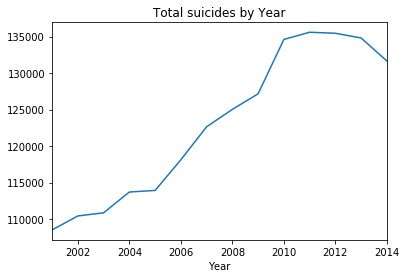

In [9]:
ax = data_by_education_status.groupby('Year')['Total'].sum().plot()
ax.set_title('Total suicides by Year')
pass

## Causes of Suicide
The list of causes reads like a list of triggers for depression, something that might call for a visit to a psychologist or a psychiatrist, and perhaps even a list of life events that occur in a lot of people’s lives (love affairs, divorce, family problems, fall in social reputation, to name a few). Not to trivialize individual situations, but a lot of these causes seem highly preventable. My aim with this dataset is to use it to use patterns in the data to identify the reasons for the rapid rise of suicide rates in India, and find out what can be done to prevent them. 

In [10]:
data_by_causes.Type.value_counts()

Causes Not Known                                  3914
Other                                             3811
Family Problems                                   3282
Other Prolonged Illness                           3148
Insanity/Mental Illness                           3005
Love Affairs                                      1995
Poverty                                           1784
Death Of Dear Person                              1769
Fall In Social Reputation                         1733
Bankruptcy Or Sudden Change In Economic Status    1712
Drug Abuse/Addiction                              1658
Suspected/Illicit Relation                        1633
Unemployment                                      1632
Property Dispute                                  1628
Failure In Examination                            1617
Cancer                                            1465
Professional/Career Problem                       1351
Cancellation/Non-Settlement Of Marriage           1322
Not Having

In [11]:
aggr_data = DataFrame(data_by_education_status.groupby(['Year','State'])['Total'].sum())

In [12]:
aggr_data_sorted = aggr_data.reset_index().sort_values(['Year','Total'], ascending=False)

In [13]:
top_10_states = data_by_education_status.groupby('State')['Total'].sum().sort_values(ascending=False)[:10].index.values
top_10_states

array(['Maharashtra', 'West Bengal', 'Tamil Nadu', 'Andhra Pradesh',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Gujarat', 'Chhattisgarh',
       'Odisha'], dtype=object)

## Analysis Plan
To identify a cause, I plan to analyze and compare suicide rates to demographic indicators such as literacy rates over time, access to health services, access to the Internet in urban and rural India. Because the data is rich enough that there is a cause associated with most suicide counts, I will be able to localize the cause to a state, year, and age group, and match it with local trends. This will also let me identify at-risk demographic groups in each state.

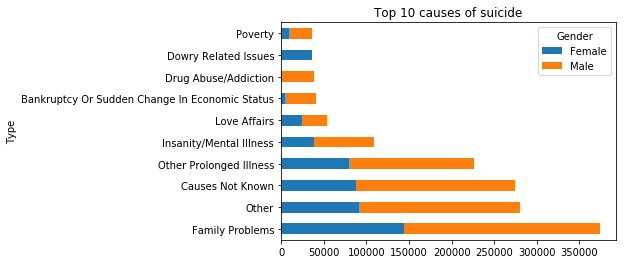

In [14]:
summary_causes_gender = data_by_causes.groupby(['Type','Gender'])['Total'].sum().unstack('Gender')
summary_causes_gender['Total'] = summary_causes_gender.Female + summary_causes_gender.Male
ax = summary_causes_gender.sort_values(by='Total',ascending=False)[['Female','Male']][:10].plot(kind='barh',stacked=True)
ax.set_title('Top 10 causes of suicide')
pass

In [15]:
summary_causes_agegroup = DataFrame(data_by_causes.groupby(['Age_group','Type'])['Total'].sum())
summary_causes_agegroup = summary_causes_agegroup.reset_index()
summary_causes_agegroup.loc[summary_causes_agegroup.groupby('Age_group')['Total'].idxmax()]

,Age_group,Type,Total
18,0-14,Other,10835
39,15-29,Family Problems,132149
67,30-44,Family Problems,137147
95,45-59,Family Problems,76342
132,60+,Other Prolonged Illness,36989


For example, the states of West Bengal, Maharashtra, Tamil Nadu, and Andhra Pradesh are known to produce large volumes of candidates for competitive examinations, and these states are among the top 5 for the cause of suicide ‘Failure in Examination’. 
Once a trend is identified, it can be used to pinpoint areas in which the government or non-profits can intervene to provide the necessary services. 


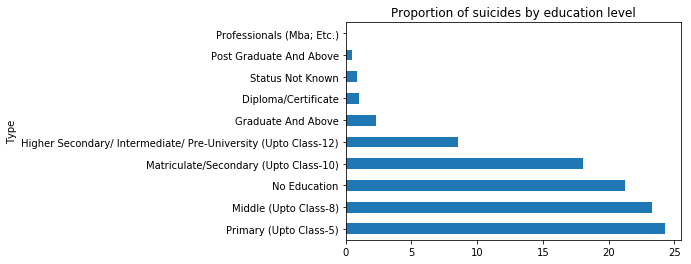

In [16]:
ax = (data_by_education_status.groupby('Type')['Total'].sum()/data_by_education_status['Total'].sum()*100).sort_values(ascending=False).plot(kind='barh')
ax.set_title('Proportion of suicides by education level')
pass

In [17]:
ax = data_by_causes[data_by_causes.Type == 'Failure in Examination'].groupby(['State','Age_group']).Total.sum().sort_values(ascending=False)[:5].plot(kind='barh')
ax.set_xlabel('Suicide count 2001-2012')
ax.set_ylabel('State & Age group')
ax.set_title('Top 5 State + Age groups for suicide deaths due to failure in examinations')
pass

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
data_by_causes[(data_by_causes.Type=='Love Affairs') & (data.State == 'West Bengal')].groupby(['Year','Age_group'])['Total'].sum().unstack().plot()


In [ ]:
data_by_causes.State.unique()

In [ ]:
data_2013 = data[data.Year == 2013]

In [ ]:
len(data_2013.State.unique())

In [ ]:
data_2013[data_2013.State.str.contains(r'A.*N.*')].State.unique()

In [ ]:
data.loc[data.State.str.contains(r'A.*N.*'),'State'] = 'A & N Islands'

In [ ]:
data_2013.groupby('Type_code')['Total'].sum()

In [ ]:
data_causes_2014 = data_2014[data_2014.Type_code == 'Causes']

In [ ]:
data_causes_2014.groupby('Gender').Total.sum()

In [ ]:
data_2014[(~(data_2014.Age_group == '0-100+'))].groupby(['State','Gender','Age_group','Type_code']).Total.sum()

In [ ]:
data_2014.Age_group.unique()

In [ ]:
data_2014.loc[data_2014.Type_code == '15-29','Type_code'] = 'Means_adopted'

In [ ]:
data_2014[data_2014.Age_group.isin(['14-29','30-45','45-60'])].Type_code.unique()

In [ ]:
data_2014.loc[data_2014.Age_group.isin(['40-59']),'Age_group'] = '45-59'

In [ ]:
data_2014 = data_2014[~(data_2014.Type.isin(['Illness','Marriage Related Issues']))]

In [ ]:
data_by_causes[data_by_causes.Type == 'Illness'].Year.unique()

In [ ]:
data = data[~(data.Type.isin(['Illness','Marriage Related Issues']))]

In [ ]:
data = data[~(data.Type.isin(['By Jumping from','By Poison']))]

In [ ]:
data_old[data_old.Type_code == 'Means_adopted'].Type.unique()

In [ ]:
data_2014[data_2014.Type_code == 'Means_adopted'].Type.unique()

In [ ]:
data[data.Type_code == 'Means_adopted'].Type.unique()

In [ ]:
data[data.Type == 'Building']['Type'] = 'By Jumping from (Building)'

In [ ]:
data.State.unique()

In [ ]:
data.to_csv('Suicides_in_India_2001-2014.csv')